In [1]:
from matplotlib import pyplot as plt
from collections import deque
import random
from IPython import display
from time import sleep

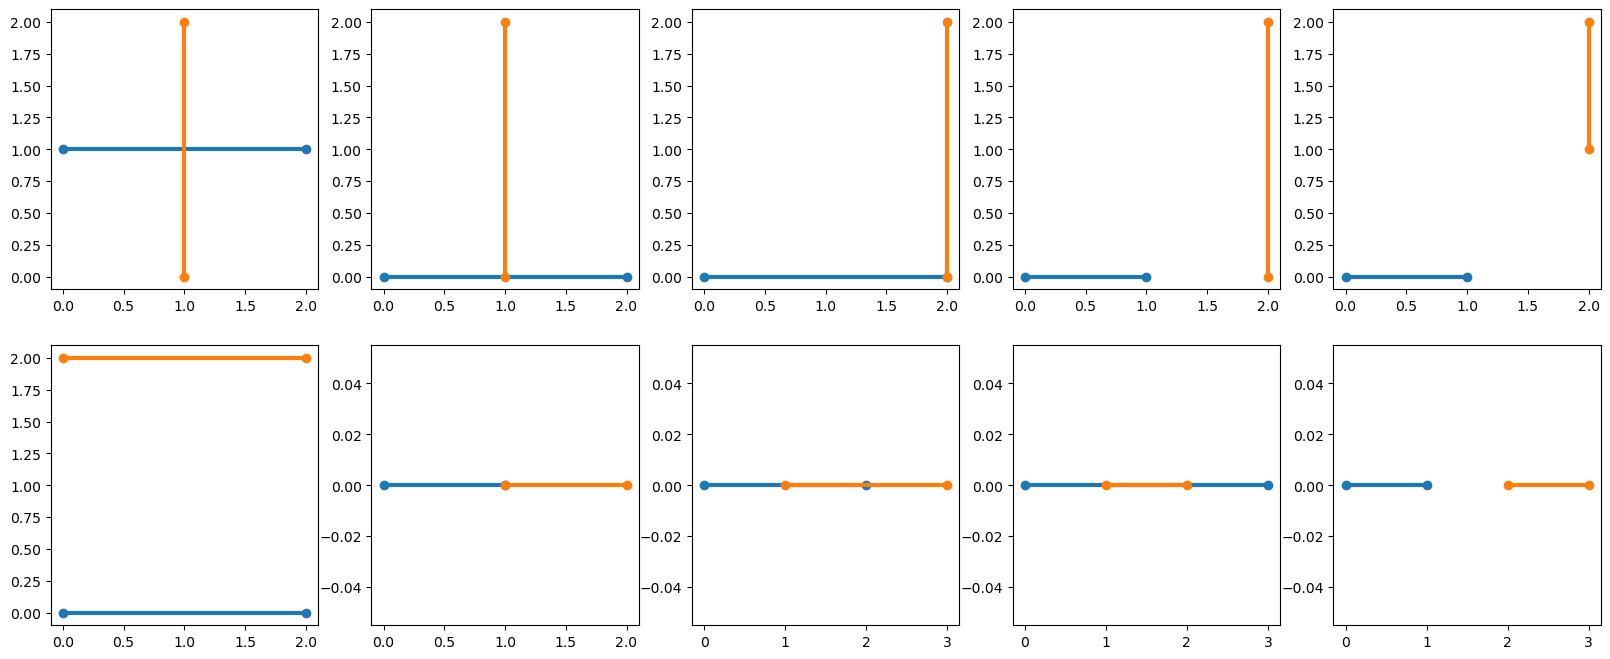

In [21]:
plt.figure(figsize=(20, 8))
plt.subplot(2, 5, 1)
plt.plot([0, 2], [1, 1], 'o-', linewidth=3)
plt.plot([1, 1], [0, 2], 'o-', linewidth=3)

plt.subplot(2, 5, 2)
plt.plot([0, 2], [0, 0], 'o-', linewidth=3)
plt.plot([1, 1], [0, 2], 'o-', linewidth=3)

plt.subplot(2, 5, 3)
plt.plot([0, 2], [0, 0], 'o-', linewidth=3)
plt.plot([2, 2], [0, 2], 'o-', linewidth=3)

plt.subplot(2, 5, 4)
plt.plot([0, 1], [0, 0], 'o-', linewidth=3)
plt.plot([2, 2], [0, 2], 'o-', linewidth=3)

plt.subplot(2, 5, 5)
plt.plot([0, 1], [0, 0], 'o-', linewidth=3)
plt.plot([2, 2], [1, 2], 'o-', linewidth=3)

plt.subplot(2, 5, 6)
plt.plot([0, 2], [0, 0], 'o-', linewidth=3)
plt.plot([0, 2], [2, 2], 'o-', linewidth=3)

plt.subplot(2, 5, 7)
plt.plot([0, 1], [0, 0], 'o-', linewidth=3)
plt.plot([1, 2], [0, 0], 'o-', linewidth=3)

plt.subplot(2, 5, 8)
plt.plot([0, 2], [0, 0], 'o-', linewidth=3)
plt.plot([1, 3], [0, 0], 'o-', linewidth=3)

plt.subplot(2, 5, 9)
plt.plot([0, 3], [0, 0], 'o-', linewidth=3)
plt.plot([1, 2], [0, 0], 'o-', linewidth=3)

plt.subplot(2, 5, 10)
plt.plot([0, 1], [0, 0], 'o-', linewidth=3)
plt.plot([2, 3], [0, 0], 'o-', linewidth=3)

plt.show()

In [2]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

        
class Line:
    def __init__(self, point_1, point_2, i):
        self.point_1 = point_1
        self.point_2 = point_2
        self.group = i
        self.visited = False;

In [3]:
def ccw(point_1, point_2, point_3):
    points = [point_1, point_2, point_3, point_1]
    ccw_sum = 0
    for i in range(3):
        ccw_sum += points[i].x * points[i + 1].y
        ccw_sum -= points[i].y * points[i + 1].x
    return ccw_sum


def is_cross(line_1, line_2):
    ccw_1 = ccw(line_1.point_1, line_1.point_2, line_2.point_1);
    ccw_2 = ccw(line_1.point_1, line_1.point_2, line_2.point_2);
    ccw_3 = ccw(line_2.point_1, line_2.point_2, line_1.point_1);
    ccw_4 = ccw(line_2.point_1, line_2.point_2, line_1.point_2);
    
    result_1 = ccw_1 * ccw_2;
    result_2 = ccw_3 * ccw_4;

    if (result_1 < 0 and result_2 < 0): return True
    elif (result_1 > 0 and result_2 > 0): return False
    elif ((result_1 == 0 and result_2 < 0) or (result_1 < 0 and result_2 == 0)): return True
    elif ((result_1 == 0 and result_2 > 0) or (result_1 > 0 and result_2 == 0)): return False
    elif ((result_1 > 0 and result_2 < 0) or (result_1 < 0 and result_2 > 0)): return False
    else:
        if ((((line_1.point_1.x > line_2.point_1.x and line_1.point_2.x > line_2.point_1.x) and \
            (line_1.point_1.x > line_2.point_2.x and line_1.point_2.x > line_2.point_2.x)) or \
            ((line_1.point_1.y > line_2.point_1.y and line_1.point_2.y > line_2.point_1.y) and \
                (line_1.point_1.y > line_2.point_2.y and line_1.point_2.y > line_2.point_2.y))) or \

            (((line_2.point_1.x > line_1.point_1.x and line_2.point_2.x > line_1.point_1.x) and \
                (line_2.point_1.x > line_1.point_2.x and line_2.point_2.x > line_1.point_2.x)) or \
                ((line_2.point_1.y > line_1.point_1.y and line_2.point_2.y > line_1.point_1.y) and \
                    (line_2.point_1.y > line_1.point_2.y and line_2.point_2.y > line_1.point_2.y)))): return False;
        else: return True;
        

def Find(lines, i):
    if (lines[i].group == i): return i
    else:
        lines[i].group = Find(lines, lines[i].group)
    return lines[i].group


def Union(lines, i, j):
    group_i = Find(lines, i)
    group_j = Find(lines, j)
    if (group_i != group_j):
        lines[j].group = group_i

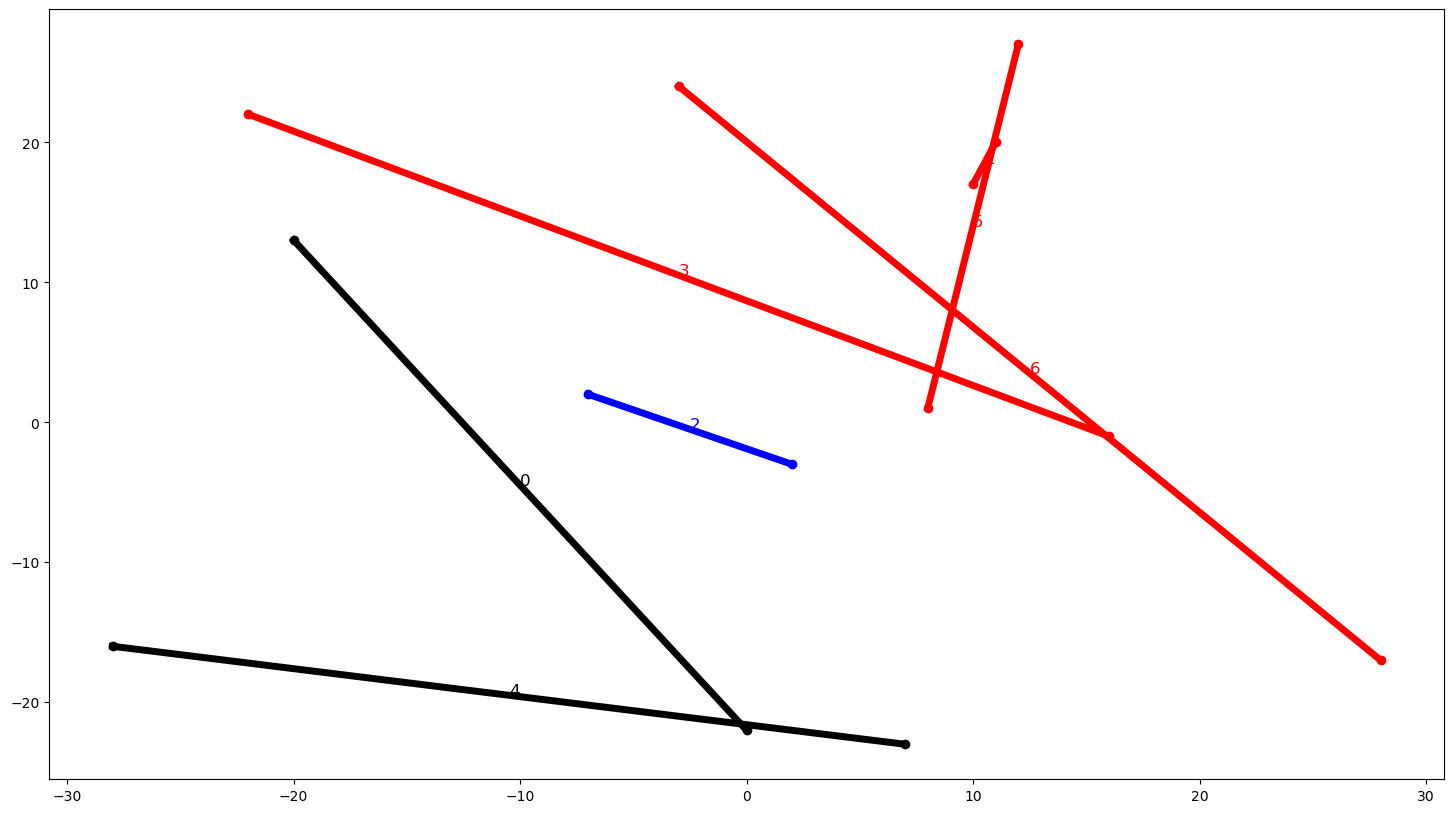

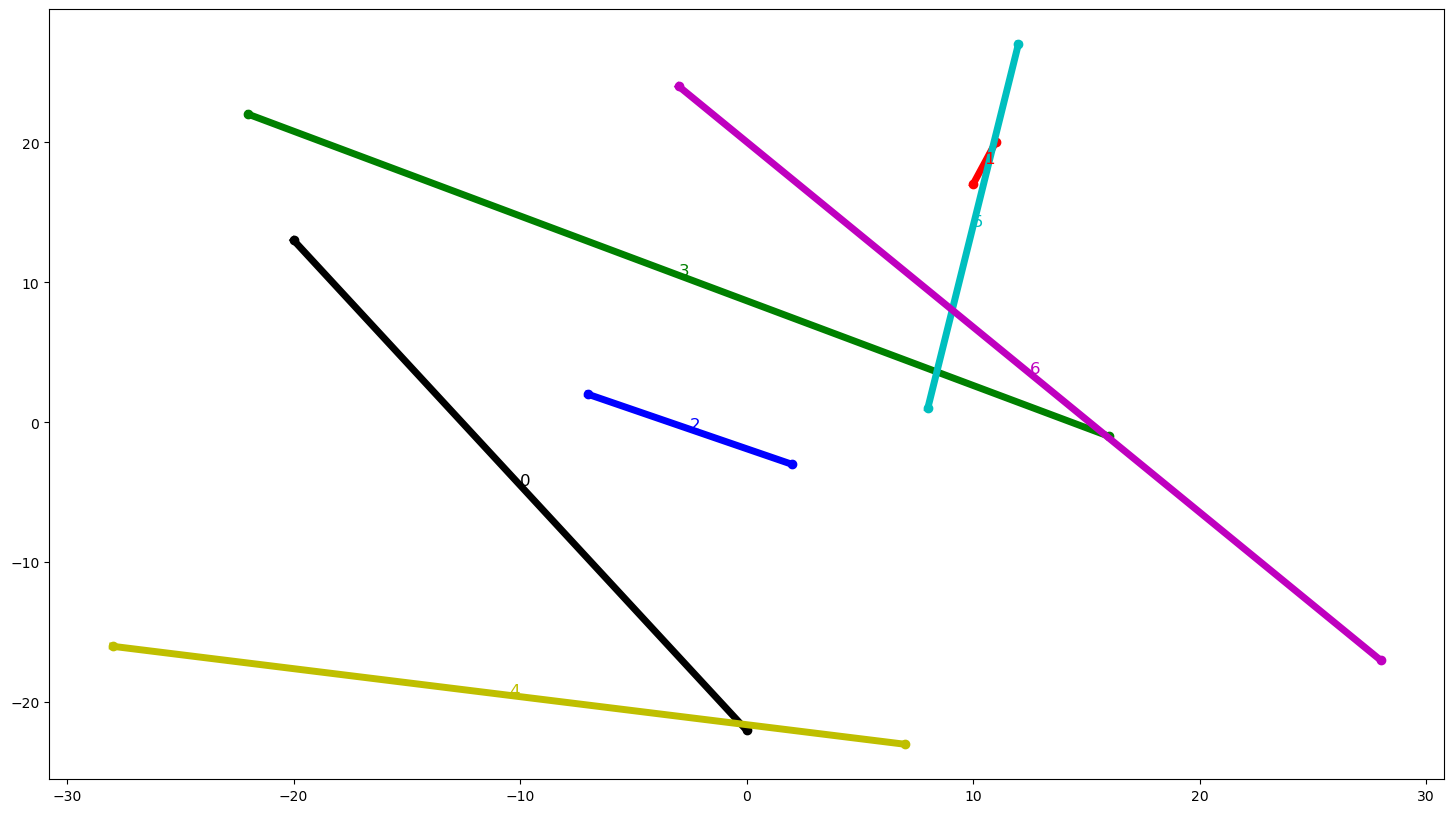

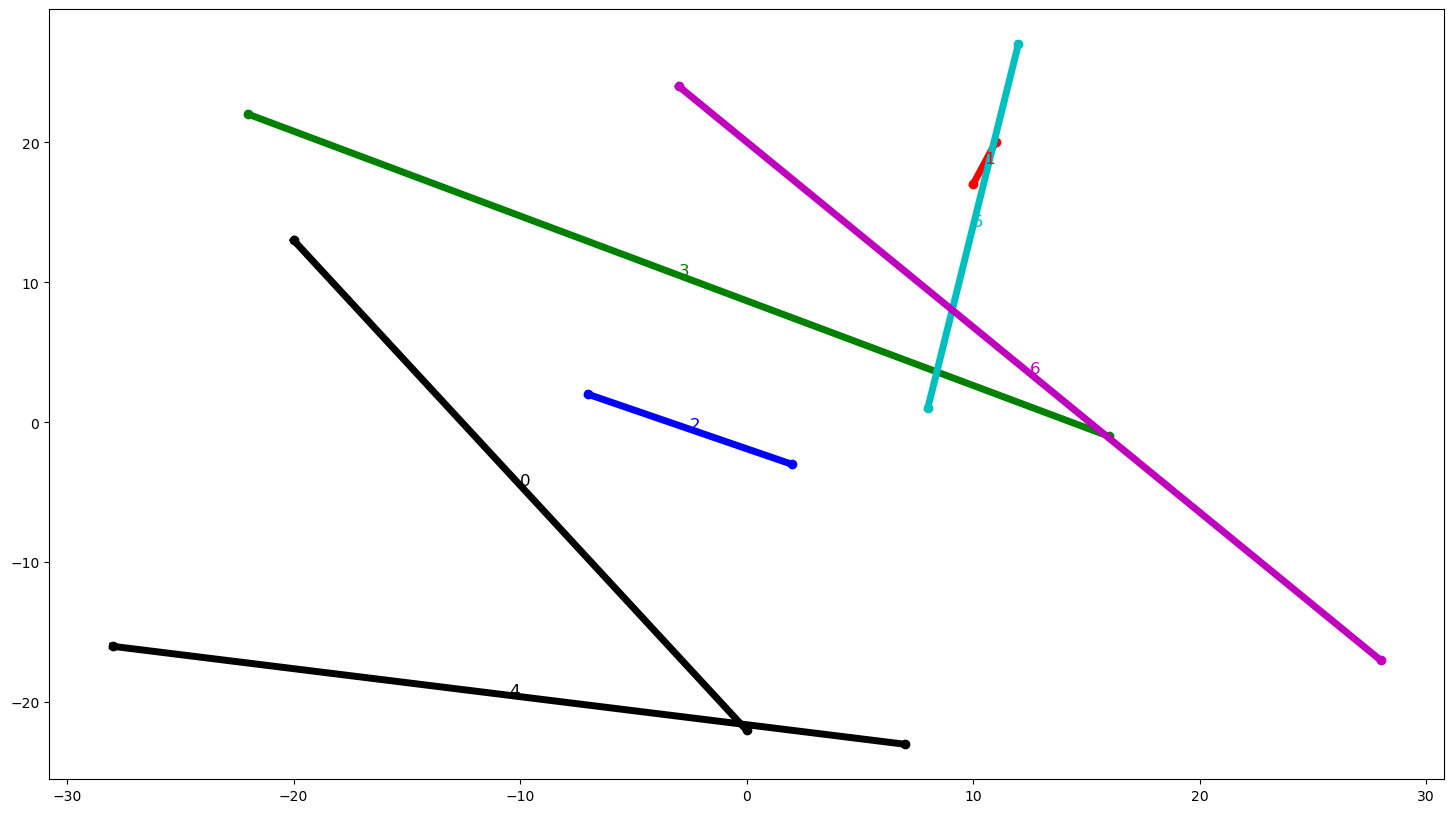

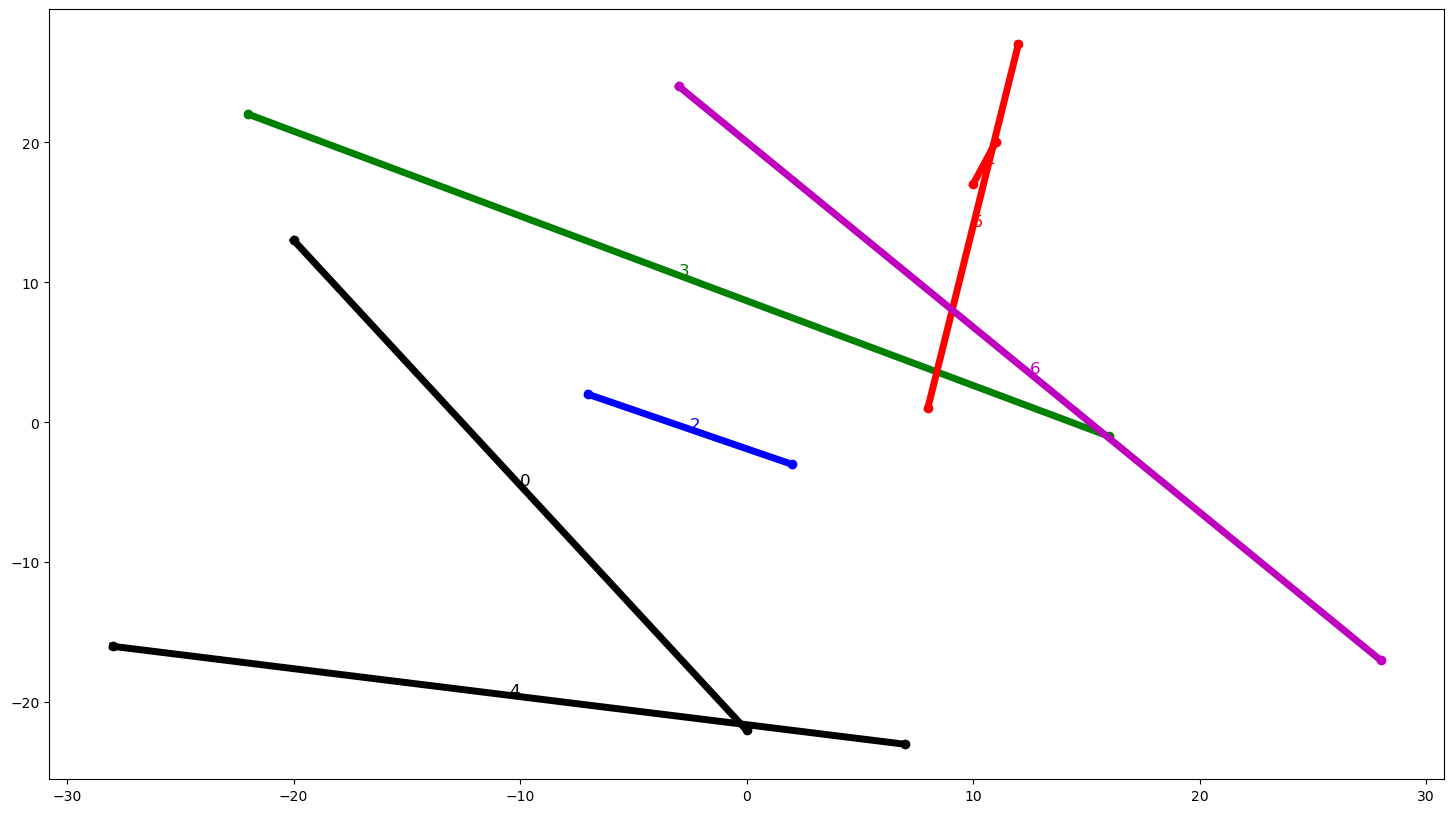

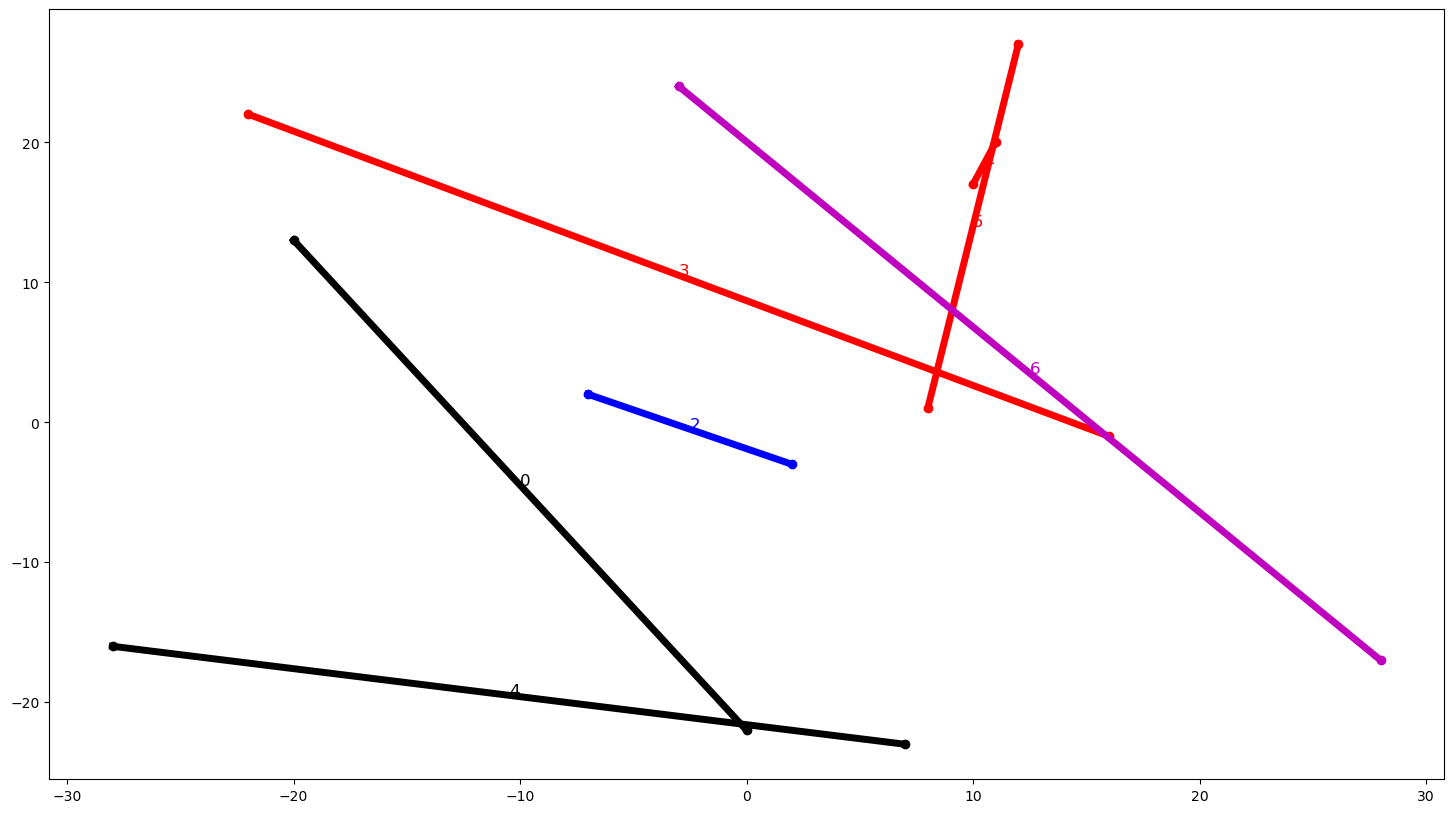

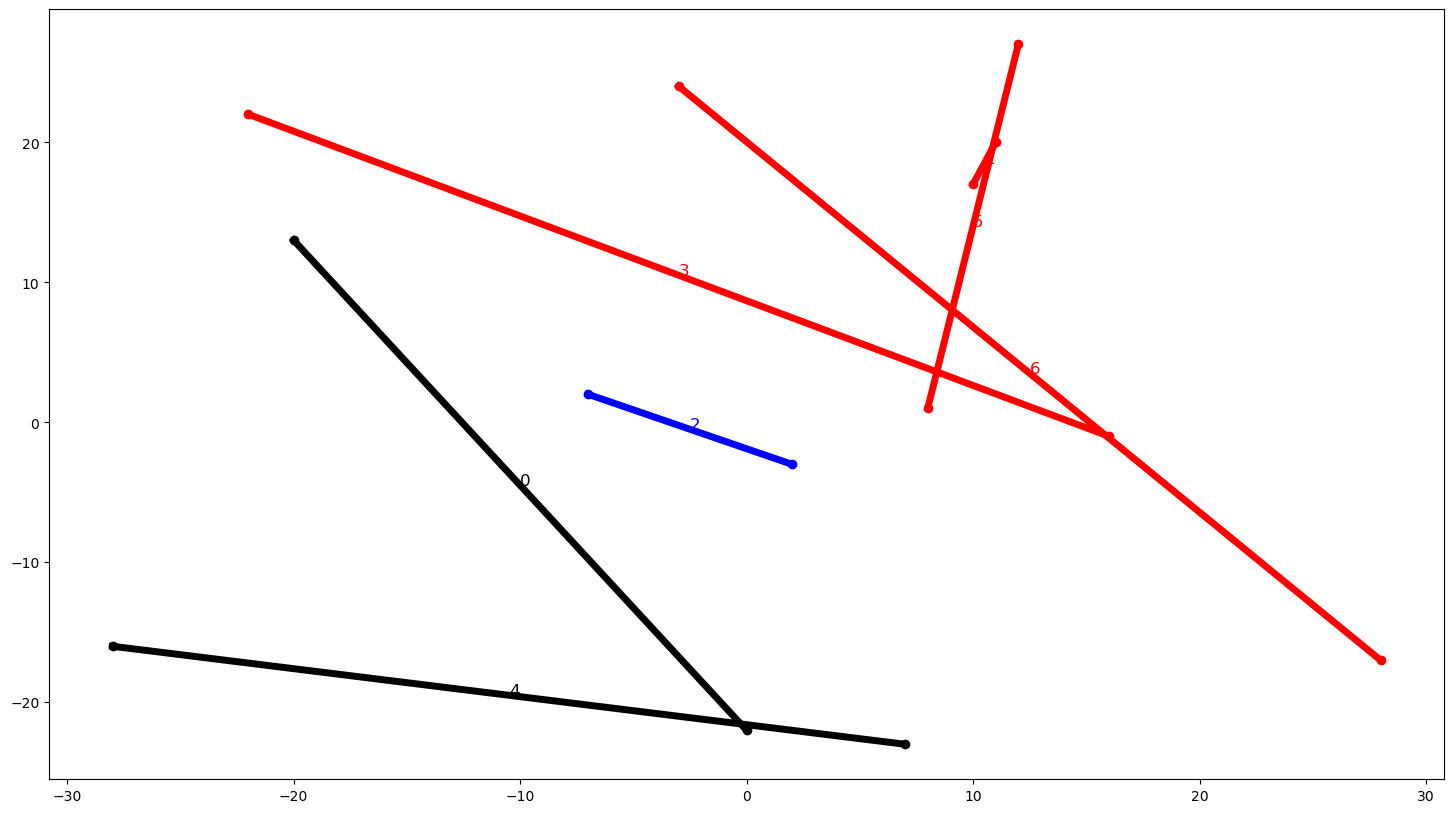

In [37]:
N = 7
xs = random.sample(range(-4*N, 4*N+1), 2*N)
ys = random.sample(range(-4*N, 4*N+1), 2*N)

lines = []

for i in range(0, 2*N, 2):
    point_1 = Point(xs[i], ys[i])
    point_2 = Point(xs[i+1], ys[i+1])
    line = Line(point_1, point_2, i//2)
    lines.append(line)

colors = ['k','r','b','g','y', 'c', 'm']

plt.figure(figsize=(18, 10))

for i in range(N):
    line = lines[i]
    point_1 = line.point_1
    point_2 = line.point_2
    plt.plot([point_1.x, point_2.x], [point_1.y, point_2.y], f'{colors[i]}o-', linewidth=5)
    plt.text((point_1.x + point_2.x)/2, (point_1.y + point_2.y)/2, f'{i}', fontsize=12, color=colors[i])
    
display.clear_output(wait=True)
display.display(plt.gcf()) 
sleep(1)

dq = deque([0])
lines[0].visited = True
cnt = 0
while True:
    if not dq:
        for i in range(N):
            if not lines[i].visited:
                dq.append(i)
                lines[i].visited = True
                break
        if not dq: break;
    line_1 = dq.popleft()
    for i in range(N):
        line_2 = i
        
        if i == line_1:
            continue
        if lines[i].visited:
            continue
        if is_cross(lines[line_1], lines[line_2]):
            colors[line_2] = colors[line_1]
            lines[line_2].visited = True
            dq.append(line_2)
            Union(lines, line_1, line_2)
            
            plt.figure(figsize=(18, 10))
            
            plt.clf()
            for j in range(N):
                line = lines[j]
                point_1 = line.point_1
                point_2 = line.point_2
                plt.plot([point_1.x, point_2.x], [point_1.y, point_2.y], f'{colors[j]}o-', linewidth=5)
                plt.text((point_1.x + point_2.x)/2, (point_1.y + point_2.y)/2, f'{j}', fontsize=12, color=colors[j])
                
            display.clear_output(wait=True)
            display.display(plt.gcf()) 
            sleep(1)
    
groups = dict()
for i in range(N):
    group = Find(lines, i)
    if group in groups.keys():
        groups[group] += 1
    else:
        groups[group] = 1

max_lines = 0
for key, value in groups.items():
    max_lines = max(max_lines, value)

2
3
